In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('kmeans_model.pkl', 'rb') as file:
    kmeans_model = pickle.load(file)

In [3]:
# Load and display cluster centroids
centroids = kmeans_model.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.409091,25.272727,25.727273,79.363636
1,0.412500,42.937500,55.087500,49.712500
2,0.527778,40.666667,87.750000,17.583333
3,0.461538,32.692308,86.538462,82.128205
4,0.391304,45.217391,26.304348,20.913043


In [5]:
centroids_df['ClusterNo'] = pd.Series([1, 2, 3, 4, 5])
centroids_df

,Genre,Age,Annual Income (k$),Spending Score (1-100),ClusterNo
0,0.409091,25.272727,25.727273,79.363636,1
1,0.412500,42.937500,55.087500,49.712500,2
2,0.527778,40.666667,87.750000,17.583333,3
3,0.461538,32.692308,86.538462,82.128205,4
4,0.391304,45.217391,26.304348,20.913043,5


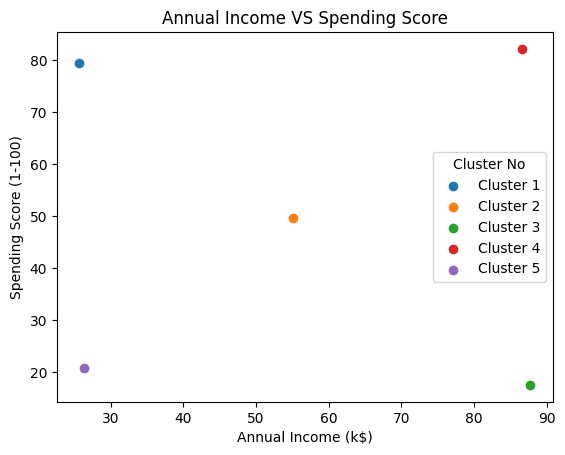

In [6]:
# Loop through each unique cluster and plot its points
for cluster in centroids_df['ClusterNo'].unique():
    cluster_point = centroids_df[centroids_df['ClusterNo'] == cluster]
    plt.scatter(cluster_point['Annual Income (k$)'],
                cluster_point['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income VS Spending Score')
plt.legend(title='Cluster No')
plt.show()


We can observe from 'Age' column and the scatter plot above that:

1: "Cluster 1: Young adults, budget-conscious with high spending tendencies."

2: "Cluster 2: Middle-aged customers with stable income and moderate spending."

3: "Cluster 3: Older professionals with high income but low spending."

4: "Cluster 4: Individuals enjoying luxury and high spending."

5: "Cluster 5: Older individuals or lower-income customers focused on value."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


Text(0, 0.5, 'Frequency')

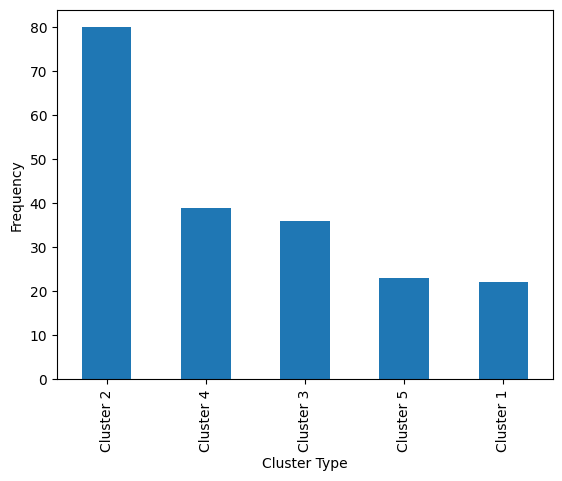

In [7]:
# Cluster sizes
labels = pd.DataFrame(kmeans_model.labels_)
labels[0] = labels[0].astype('object')
labels.info()
labels[0] = labels[0].apply(lambda x: f'Cluster {x+1}')
labels[0].value_counts().plot.bar()
plt.xlabel('Cluster Type')
plt.ylabel('Frequency')

Most people in this dataset belong to Cluster 2, which represents "middle-aged customers with stable incomes and moderate spending patterns."